In [73]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import gridspec
plt.rcParams["font.family"] = "serif"


def mumuFrom14(x):
    return np.sin(2*np.arcsin(np.sqrt(x)))**2


def getContour(x,y,z,val):
    N=1000

    levels = [val]

    xi = np.linspace(x.min(), x.max(), N)
    yi = np.linspace(y.min(), y.max(), N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')


    cs = plt.contour(xi,yi,zi,levels, colors='black', linewidth=.5)

    p = cs.collections[0].get_paths()
    v = p.vertices
    return v


execfile("/home/mark/projects/sbn_3pN/plots_python/colors.py")







In [268]:

datm=np.genfromtxt("/home/mark/projects/miniboone2.0/plots/bound_test_m")
datz=np.genfromtxt("/home/mark/projects/miniboone2.0/plots/bound_test_z")
datall=np.genfromtxt("/home/mark/projects/miniboone2.0/plots/bound_test_all")

boundPS191 = np.genfromtxt("/home/mark/projects/miniboone2.0/data/bounds/PS191_UM4_EE_BOTH.dat")
boundBABAR = np.genfromtxt("/home/mark/projects/miniboone2.0/data/bounds/b1_babar2014.csv")
boundGM2 = np.genfromtxt("/home/mark/projects/miniboone2.0/data/bounds/b1_mg2.csv")
boundPEAK = np.genfromtxt("/home/mark/projects/miniboone2.0/data/bounds/peak_um4.dat")
                    

In [250]:
label_font_size=35
tick_font_size= 15
text_font_size= 22

c0 = 'red'
c1 = 'blue'
c2 = 'orange'
c3 = gCols[2]
c3b = gCols[0]

cg = 'purple'

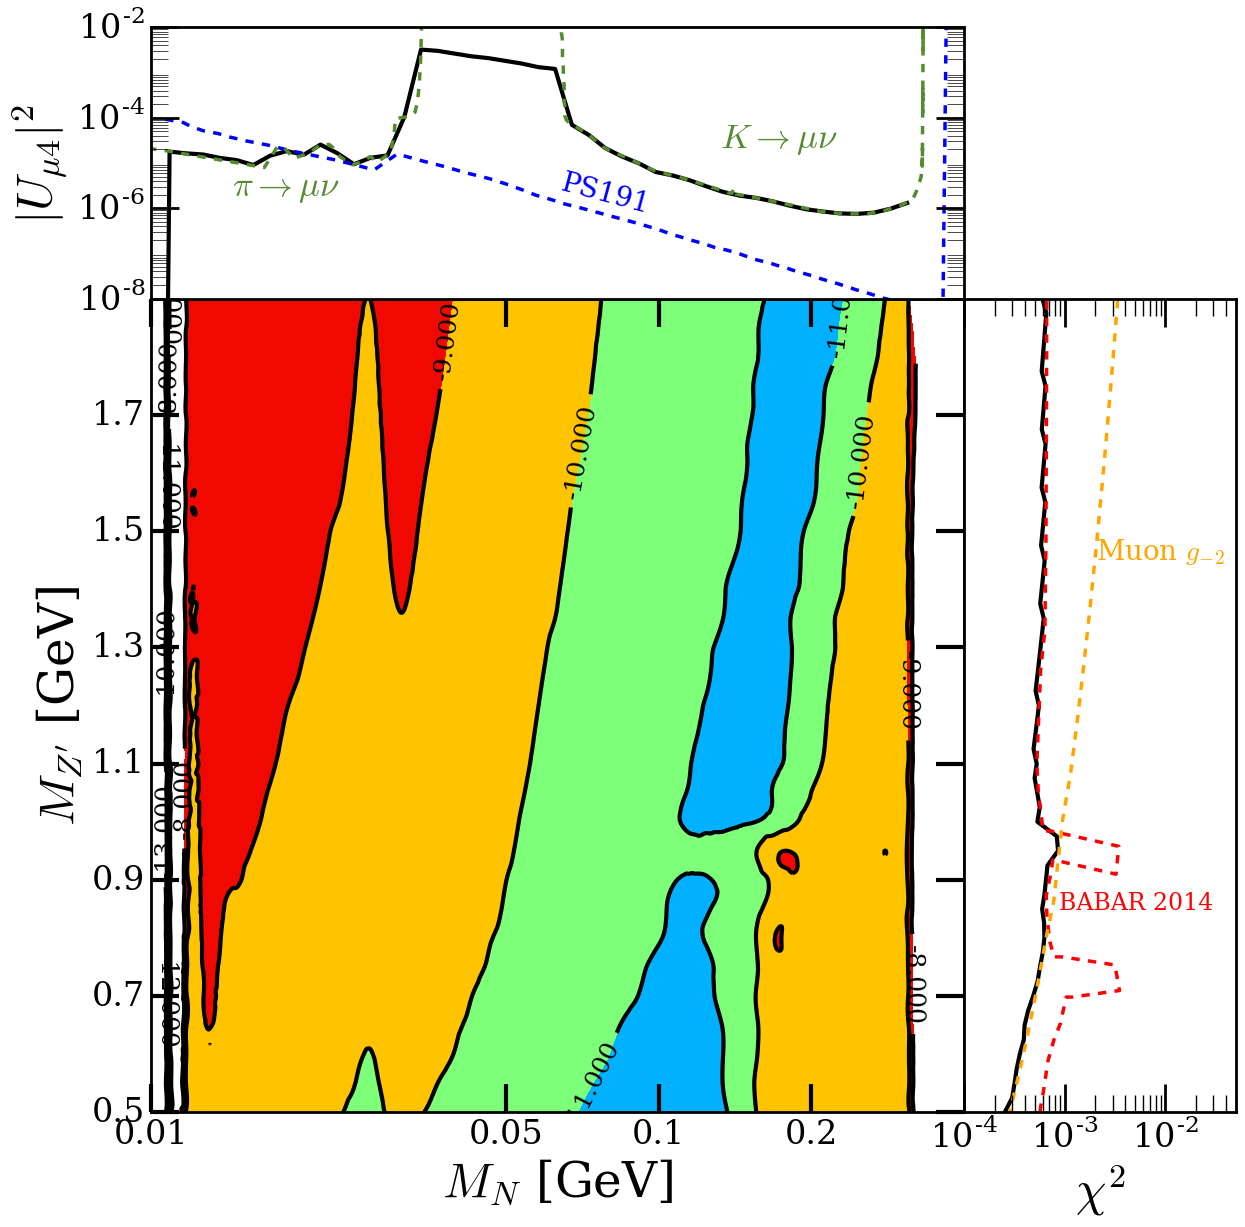

In [293]:
mhigh = 0.



f=plt.figure(figsize=(14,14), dpi=100)
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[3, 1],
                       height_ratios=[1, 3]
                       )
gs.update(wspace=0.0, hspace=0.0)
# Create a new subplot from a grid of 1x1

plt.rcParams.update({'font.size': 24})
plt.rc('axes', linewidth=2)

ax2=plt.subplot(gs[2]) 
x=np.log10(datall[:,0])
y=datall[:,1]
z=np.log10(datall[:,4])
levels = [-13,-12,-11,-10,-9,-8]
xi = np.linspace(x.min(), x.max(), N)
yi = np.linspace(y.min(), y.max(), N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')


plt.contourf(xi,yi,zi,levels,linewidth=.5)
CS=plt.contour(xi,yi,zi,levels,colors='k',linewidths=3)

#plt.xlim(0,0.5)
ax2.set_autoscale_on(False)
ax2.set_xlim([-2,np.log10(0.4)])
ax2.set_ylim([0.5,1.9])

N=1000

ax2.set_xlabel(r'$M_N$ [GeV]',fontsize=label_font_size)
ax2.set_ylabel(r'$M_{Z^\prime}$ [GeV]',fontsize=label_font_size)

ax2.yaxis.set_ticks(np.arange(0.5,1.9,0.2))
ax2.xaxis.set_ticks([-2,np.log10(0.05),np.log10(0.1),np.log10(0.2)])
ax2.xaxis.set_ticklabels(["0.01","0.05","0.1","0.2"])

ax2.tick_params('both',length=12, width=1, which='minor' )
ax2.tick_params('both',length=20, width=3, which='major' )


plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.clabel(CS, inline=1, fontsize=18)


ax3=plt.subplot(gs[3])
plt.plot(datz[:,4], datz[:,0],  color='black', linewidth=3, linestyle="-")
plt.plot(boundBABAR[:,1],boundBABAR[:,0],color=c0,linewidth=2.5, linestyle='--')
plt.plot(boundGM2[:,1]**2, boundGM2[:,0],color=c2,linewidth=2.5, linestyle='--')


ax3.set_autoscale_on(False)
ax3.tick_params('both',length=12, width=1, which='minor' )
ax3.tick_params('both',length=20, width=2, which='major' )

ax3.set_xscale("log", nonposx='clip')
ax3.set_ylim([0.5,1.9])
ax3.set_xlim([1e-4,5e-2])

ax3.set_xlabel(r'$\chi^2$',fontsize=label_font_size)

ax3.yaxis.set_visible(False)

plt.annotate('BABAR 2014',
             xy=(0.35,0.25), xycoords='axes fraction',fontsize=17,color=c0,rotation=0)
plt.annotate(r'Muon $g_{-2}$',
             xy=(0.485,0.68), xycoords='axes fraction',fontsize=20,color=c2,rotation=0)


ax=plt.subplot(gs[0])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_autoscale_on(False)
ax.xaxis.set_visible(False)

ax.yaxis.set_ticks([1e-2, 1e-4, 1e-6,1e-8])


plt.plot(datm[:,0], datm[:,4],  color='black', linewidth=3, linestyle="-")
plt.plot(boundPS191[:,0],boundPS191[:,1],color=c1,linewidth=2.5, linestyle='--')
plt.plot(boundPEAK[:,0],boundPEAK[:,1],color=c3,linewidth=2.5, linestyle='--')

#plt.plot(icecube[:,0],icecube[:,1],  color=c1 ,linewidth=2.5, dashes=d1)
#plt.plot(mumuFrom14(minos[:,0]),minos[:,1],  color=c2, linewidth=2.5, dashes=d2)
#plt.plot(sciboone[:,1],sciboone[:,0],  color=c3, linewidth=2.5, dashes=d3)

##plt.fill(lsnd1[:,0],lsnd1[:,1], edgecolor=c3, facecolor=c3b, linewidth=2.5, linestyle="-")
#plt.fill(lsnd2[:,0],lsnd2[:,1], edgecolor=c3, facecolor=c3b, linewidth=2.5,  linestyle="-")
#plt.fill(lsnd3[:,0],lsnd3[:,1], edgecolor=c3, facecolor=c3b, linewidth=2.5,  linestyle="-")

#ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)



ax.set_xlim([0.01,0.4])
plt.xlim(0.01,0.4)
ax.set_ylim([1e-8,1e-2])

ax.set_ylabel(r'$|U_{\mu 4}|^2$',fontsize=label_font_size)


#ax.tick_params('both',labelsize=tick_font_size)
ax.tick_params('both',length=12, width=0.5, which='minor' )
ax.tick_params('both',length=20, width=2, which='major' )

plt.annotate('PS191',
             xy=(0.5,0.4), xycoords='axes fraction',fontsize=20,color=c1,rotation=-15)
plt.annotate(r'$\pi \rightarrow \mu \nu$',
             xy=(0.1,0.38), xycoords='axes fraction',fontsize=25,color=c3,rotation=0)
plt.annotate(r'$K \rightarrow \mu \nu$',
             xy=(0.7,0.56), xycoords='axes fraction',fontsize=25,color=c3,rotation=0)





# Set y ticks
#plt.yticks(np.linspace(-1,1,5,endpoint=True))


# Save figure using 72 dots per inch
# savefig("../figures/exercice_2.png",dpi=72)

# Show result on screen
plt.show()
f.savefig("foo_bar.pdf", bbox_inches='tight')


In [26]:
SBN[:4]

array([[ -2.00000000e+00,   8.46502000e-02,   1.00000000e+00,
          2.11369000e-04,   2.86626000e-02],
       [ -2.00000000e+00,   3.82984000e-03,   1.00000000e+00,
          8.85622000e-10,   5.86706000e-05],
       [ -2.00000000e+00,   5.58196000e-05,   1.00000000e+00,
          3.99644000e-17,   1.24633000e-08],
       [ -2.00000000e+00,   2.93285000e-02,   1.00000000e+00,
          3.04571000e-06,   3.44065000e-03]])

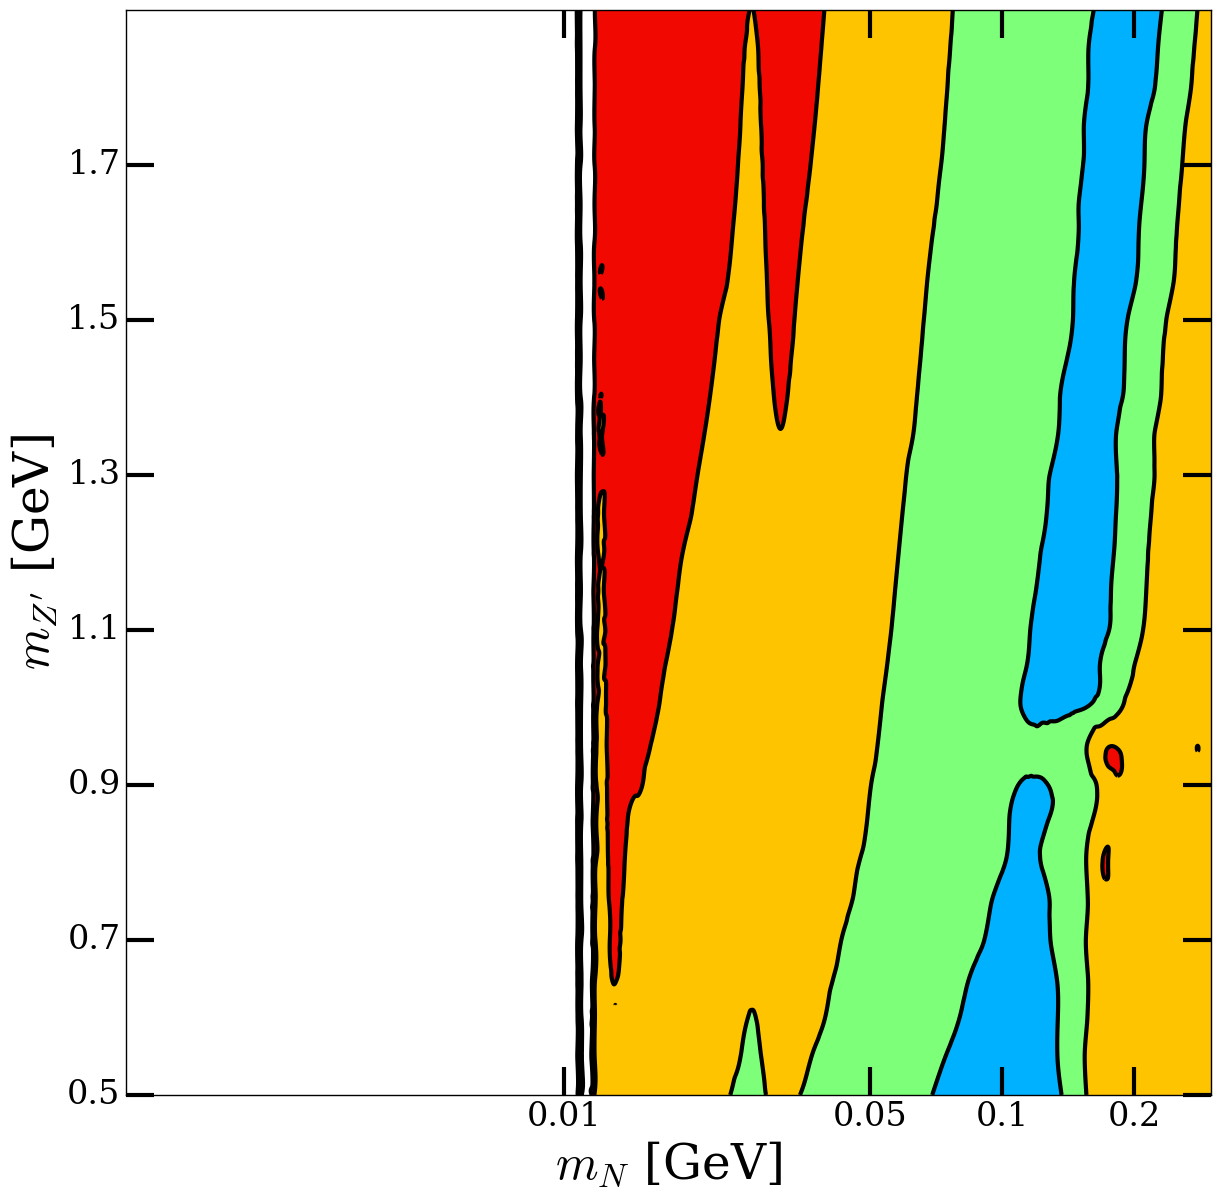

In [231]:
f2=plt.figure(figsize=(14,14), dpi=100)

bx=plt.subplot(111)  
#plt.xlim(0,0.5)
bx.set_xlim([-3,np.log10(0.3)])
bx.set_ylim([0.5,1.9])


N=1000

bx.set_xlabel(r'$m_N$ [GeV]',fontsize=label_font_size)
bx.set_ylabel(r'$m_{Z^\prime}$ [GeV]',fontsize=label_font_size)

bx.yaxis.set_ticks(np.arange(0.5,1.9,0.2))
bx.xaxis.set_ticks([-2,np.log10(0.05),np.log10(0.1),np.log10(0.2)])
bx.xaxis.set_ticklabels(["0.01","0.05","0.1","0.2"])

bx.tick_params('both',length=7, width=1, which='minor' )
bx.tick_params('both',length=20, width=3, which='major' )

plt.contourf(xi,yi,zi,levels,linewidth=.5)
CS=plt.contour(xi,yi,zi,levels,colors='k',linewidths=3)
#plt.clabel(CS, inline=1, fontsize=18)

plt.show()


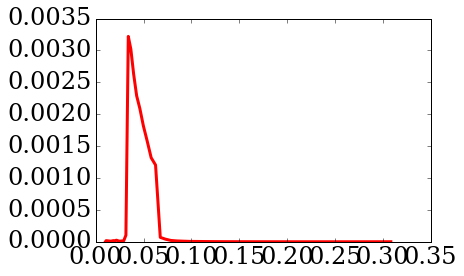

In [224]:

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_autoscale_on(False)
ax.xaxis.set_visible(False)

plt.plot(datm[:,0], datm[:,4],  color=c0, linewidth=3, linestyle="-")
#plt.plot(icecube[:,0],icecube[:,1],  color=c1 ,linewidth=2.5, dashes=d1)
#plt.plot(mumuFrom14(minos[:,0]),minos[:,1],  color=c2, linewidth=2.5, dashes=d2)
#plt.plot(sciboone[:,1],sciboone[:,0],  color=c3, linewidth=2.5, dashes=d3)

##plt.fill(lsnd1[:,0],lsnd1[:,1], edgecolor=c3, facecolor=c3b, linewidth=2.5, linestyle="-")
#plt.fill(lsnd2[:,0],lsnd2[:,1], edgecolor=c3, facecolor=c3b, linewidth=2.5,  linestyle="-")
#plt.fill(lsnd3[:,0],lsnd3[:,1], edgecolor=c3, facecolor=c3b, linewidth=2.5,  linestyle="-")

#ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)


ax.set_ylabel(r'$|U_{\mu 4}|^2$',fontsize=label_font_size)


#ax.tick_params('both',labelsize=tick_font_size)
#ax.tick_params('both',length=7, width=0.5, which='minor' )
ax.tick_params('both',length=20, width=2, which='major' )

plt.show()